In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

In [4]:
DIRECTORY = r'C:\Users\ASUS\Downloads\archive\dogscats\valid' 
CATEGORIES = ['cats','dogs']

In [5]:
IMG_SIZE = 120

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])
        

In [6]:
len(data)

2000

In [7]:
random.shuffle(data)

In [8]:
X = []
Y = []

for features, labels in data:
    X.append(features)
    Y.append(labels)

In [9]:
X = np.array(X)
Y = np.array(Y)

In [10]:
X=X/255

In [11]:
from keras.models  import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
model= Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(200, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [16]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history=model.fit(X, Y, epochs=15, validation_split=0.1)

Epoch 1/15
57/57 [==============================] - 37s 657ms/step - loss: 0.0209 - accuracy: 0.9956 - val_loss: 2.1663 - val_accuracy: 0.6700
Epoch 2/15
57/57 [==============================] - 38s 665ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 1.9978 - val_accuracy: 0.6850
Epoch 3/15
57/57 [==============================] - 39s 684ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.2620 - val_accuracy: 0.6950
Epoch 4/15
57/57 [==============================] - 38s 666ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.4124 - val_accuracy: 0.6900
Epoch 5/15
57/57 [==============================] - 38s 671ms/step - loss: 7.4619e-04 - accuracy: 1.0000 - val_loss: 2.5280 - val_accuracy: 0.6900
Epoch 6/15
57/57 [==============================] - 42s 744ms/step - loss: 4.7198e-04 - accuracy: 1.0000 - val_loss: 2.6096 - val_accuracy: 0.6800
Epoch 7/15
57/57 [==============================] - 42s 744ms/step - loss: 3.4060e-04 - accuracy: 1.0000 - val_loss: 2.6723 - val_accu

In [20]:
model.evaluate(X,Y)

63/63 [==============================] - 5s 74ms/step - loss: 0.3000 - accuracy: 0.9685


[0.30000969767570496, 0.968500018119812]

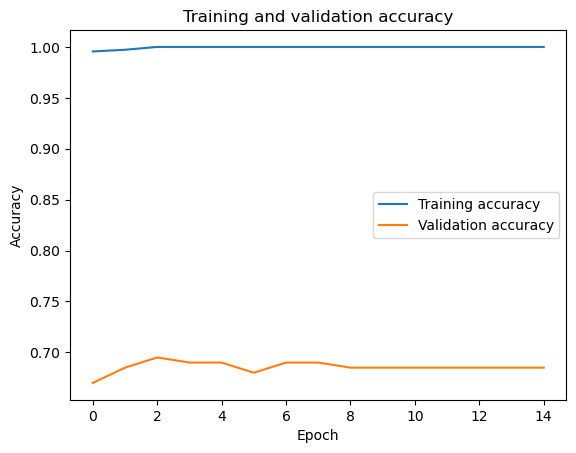

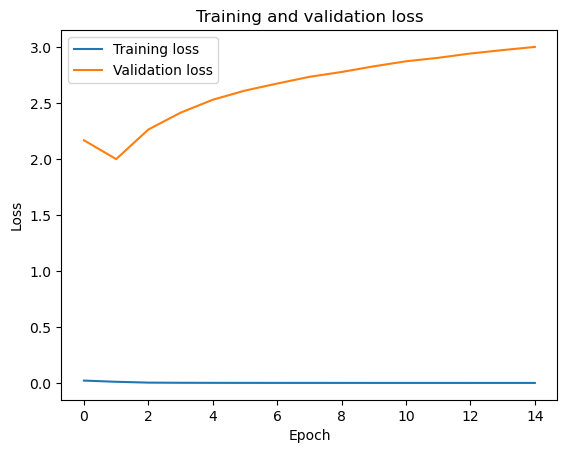

In [21]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()